<a href="https://colab.research.google.com/github/roshan151/Kaggle-ISIC-Challenge/blob/main/isic_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import shutil
import zipfile

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime as dt

from google.colab import drive

# Mount google drive in colab
drive.mount('/content/gdrive/', force_remount=True)

# Unzip dataset file in colab
kaggle_dir = '/content/gdrive/MyDrive/Kaggle/'

filename = 'isic-2024-challenge.zip'

with zipfile.ZipFile(f'{kaggle_dir}/{filename}', 'r') as zp:
  zp.extractall('Kaggle-ISIC-Challenge/dataset/')


#shutil.copy('/content/gdrive/MyDrive/Colab Notebooks/isic_data_analysis.ipynb',
#            'Kaggle-ISIC-Challenge/dataset_analysis.ipynb')



Mounted at /content/gdrive/


In [16]:
train_csv = f'Kaggle-ISIC-Challenge/dataset/train-metadata.csv'
train_df = pd.read_csv(train_csv)

columns = train_df.columns

print(f'Columns: {columns}')

train_df['tbp_lv_location_simple'][:5]#, 'tbp_lv_Cext', 'tbp_lv_H', 'tbp_lv_Hext', 'tbp_lv_L'].head(10)

# TODO: Add all variables
# Continous columns- starting analysis on a subset of columns for now
continous = ['age_approx',
 'tbp_lv_C',
 'clin_size_long_diam_mm',
 'tbp_lv_A',
 'tbp_lv_Aext',
 'tbp_lv_B',
 'tbp_lv_Bext',
 'tbp_lv_C',
 'tbp_lv_Cext',
 'tbp_lv_H',
 'tbp_lv_Hext',
'tbp_lv_L',
'tbp_lv_Lext',
'tbp_lv_areaMM2',
'tbp_lv_area_perim_ratio',
'tbp_lv_color_std_mean',
'tbp_lv_deltaA',
'tbp_lv_deltaB',
'tbp_lv_deltaL',
'tbp_lv_deltaLB',
'tbp_lv_deltaLBnorm',
'tbp_lv_eccentricity',]

# Categorical columns
categorical = ['anatom_site_general',
 'tbp_tile_type',
 'image_type',
 'tbp_lv_location',
 'tbp_lv_location_simple']

continous_vars = train_df[continous]
categorical_vars = train_df[categorical]

continous_vars['target'] = train_df['target']
continous_vars['id'] = train_df['isic_id']


<ipython-input-16-4cfcf3c08c4f>:2: DtypeWarning: Columns (51,52) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv(train_csv)


Columns: Index(['isic_id', 'target', 'patient_id', 'age_approx', 'sex',
       'anatom_site_general', 'clin_size_long_diam_mm', 'image_type',
       'tbp_tile_type', 'tbp_lv_A', 'tbp_lv_Aext', 'tbp_lv_B', 'tbp_lv_Bext',
       'tbp_lv_C', 'tbp_lv_Cext', 'tbp_lv_H', 'tbp_lv_Hext', 'tbp_lv_L',
       'tbp_lv_Lext', 'tbp_lv_areaMM2', 'tbp_lv_area_perim_ratio',
       'tbp_lv_color_std_mean', 'tbp_lv_deltaA', 'tbp_lv_deltaB',
       'tbp_lv_deltaL', 'tbp_lv_deltaLB', 'tbp_lv_deltaLBnorm',
       'tbp_lv_eccentricity', 'tbp_lv_location', 'tbp_lv_location_simple',
       'tbp_lv_minorAxisMM', 'tbp_lv_nevi_confidence', 'tbp_lv_norm_border',
       'tbp_lv_norm_color', 'tbp_lv_perimeterMM',
       'tbp_lv_radial_color_std_max', 'tbp_lv_stdL', 'tbp_lv_stdLExt',
       'tbp_lv_symm_2axis', 'tbp_lv_symm_2axis_angle', 'tbp_lv_x', 'tbp_lv_y',
       'tbp_lv_z', 'attribution', 'copyright_license', 'lesion_id',
       'iddx_full', 'iddx_1', 'iddx_2', 'iddx_3', 'iddx_4', 'iddx_5',
       'mel_mitotic_

<ipython-input-16-4cfcf3c08c4f>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  continous_vars['target'] = train_df['target']
<ipython-input-16-4cfcf3c08c4f>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  continous_vars['id'] = train_df['isic_id']


In [14]:

# To a sample a subset from complete df for visualization
#sample = np.random.choice([i for i in range(1, continous_vars.shape[0])], size = 5000)
#train_sample = continous_vars.iloc[sample]

#train_sample['target'].unique()
#train_sample['target_string'] = ['benign' if i == 0 else 'malignant' for i in train_sample['target']]
#train_sample['target_string'] = train_sample['target_string'].astype(str)
#train_sample['target_string'].value_counts()

#train_sample.head(10)

<ipython-input-14-416961a67280>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  continous_vars['target'] = train_df['target']
<ipython-input-14-416961a67280>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  continous_vars['id'] = train_df['isic_id']
<ipython-input-14-416961a67280>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

,age_approx,tbp_lv_C,clin_size_long_diam_mm,tbp_lv_A,tbp_lv_Aext,tbp_lv_B,tbp_lv_Bext,tbp_lv_C,tbp_lv_Cext,tbp_lv_H,...,tbp_lv_color_std_mean,tbp_lv_deltaA,tbp_lv_deltaB,tbp_lv_deltaL,tbp_lv_deltaLB,tbp_lv_deltaLBnorm,tbp_lv_eccentricity,target,id,target_string
55009,80.0,41.009430,2.51,25.354590,22.653480,32.232240,30.672240,41.009430,38.130920,51.810630,...,0.916187,2.701112,1.560001,-5.902313,6.257980,5.351234,0.800424,0,ISIC_1431089,benign
149032,50.0,31.984836,6.50,17.590547,10.177855,26.713338,23.649741,31.984836,25.746825,56.635374,...,1.900643,7.412692,3.063596,-10.291233,10.834069,8.528148,0.505152,0,ISIC_3772847,benign
341466,60.0,49.114980,6.28,24.983820,16.510740,42.285810,40.518780,49.114980,43.753580,59.424040,...,2.883546,8.473083,1.767033,-14.095160,14.438640,8.777879,0.812759,0,ISIC_8532105,benign
320308,50.0,38.964090,3.70,21.328180,16.949470,32.608420,30.820380,38.964090,35.173580,56.812520,...,0.734057,4.378705,1.788041,-8.605020,8.898029,6.028890,0.609779,0,ISIC_8006115,benign
126125,55.0,23.792360,4.86,13.620700,10.502594,19.507767,18.246245,23.792360,21.053027,55.076511,...,0.964908,3.118106,1.261522,-6.803002,7.053829,8.772319,0.680773,0,ISIC_3198682,benign
166516,50.0,35.571257,3.67,16.872289,12.004517,31.315175,27.381796,35.571257,29.897679,61.684677,...,0.319183,4.867772,3.933379,-6.596599,7.877288,5.644343,0.915574,0,ISIC_4202410,benign
101127,55.0,40.908060,3.10,20.634170,10.767980,35.322800,31.434520,40.908060,33.227670,59.708230,...,1.520282,9.866189,3.888285,-15.658540,16.332220,10.386970,0.781756,0,ISIC_2577379,benign
246100,70.0,35.777771,2.99,23.603362,17.243469,26.887361,28.045216,35.777771,32.922202,48.721369,...,2.116572,6.359893,-1.157855,-18.561423,19.133128,12.406054,0.751065,0,ISIC_6183148,benign
78432,45.0,48.880729,3.82,30.867608,20.020111,37.901404,38.917597,48.880729,43.765103,50.839988,...,1.375992,10.847497,-1.016194,-10.666957,10.874839,6.417308,0.717142,0,ISIC_2013050,benign
282594,40.0,27.541520,7.30,16.179040,7.956950,22.288430,21.656240,27.541520,23.071750,54.024330,...,2.738538,8.222089,0.632194,-14.288690,14.415480,12.339710,0.844619,0,ISIC_7074298,benign


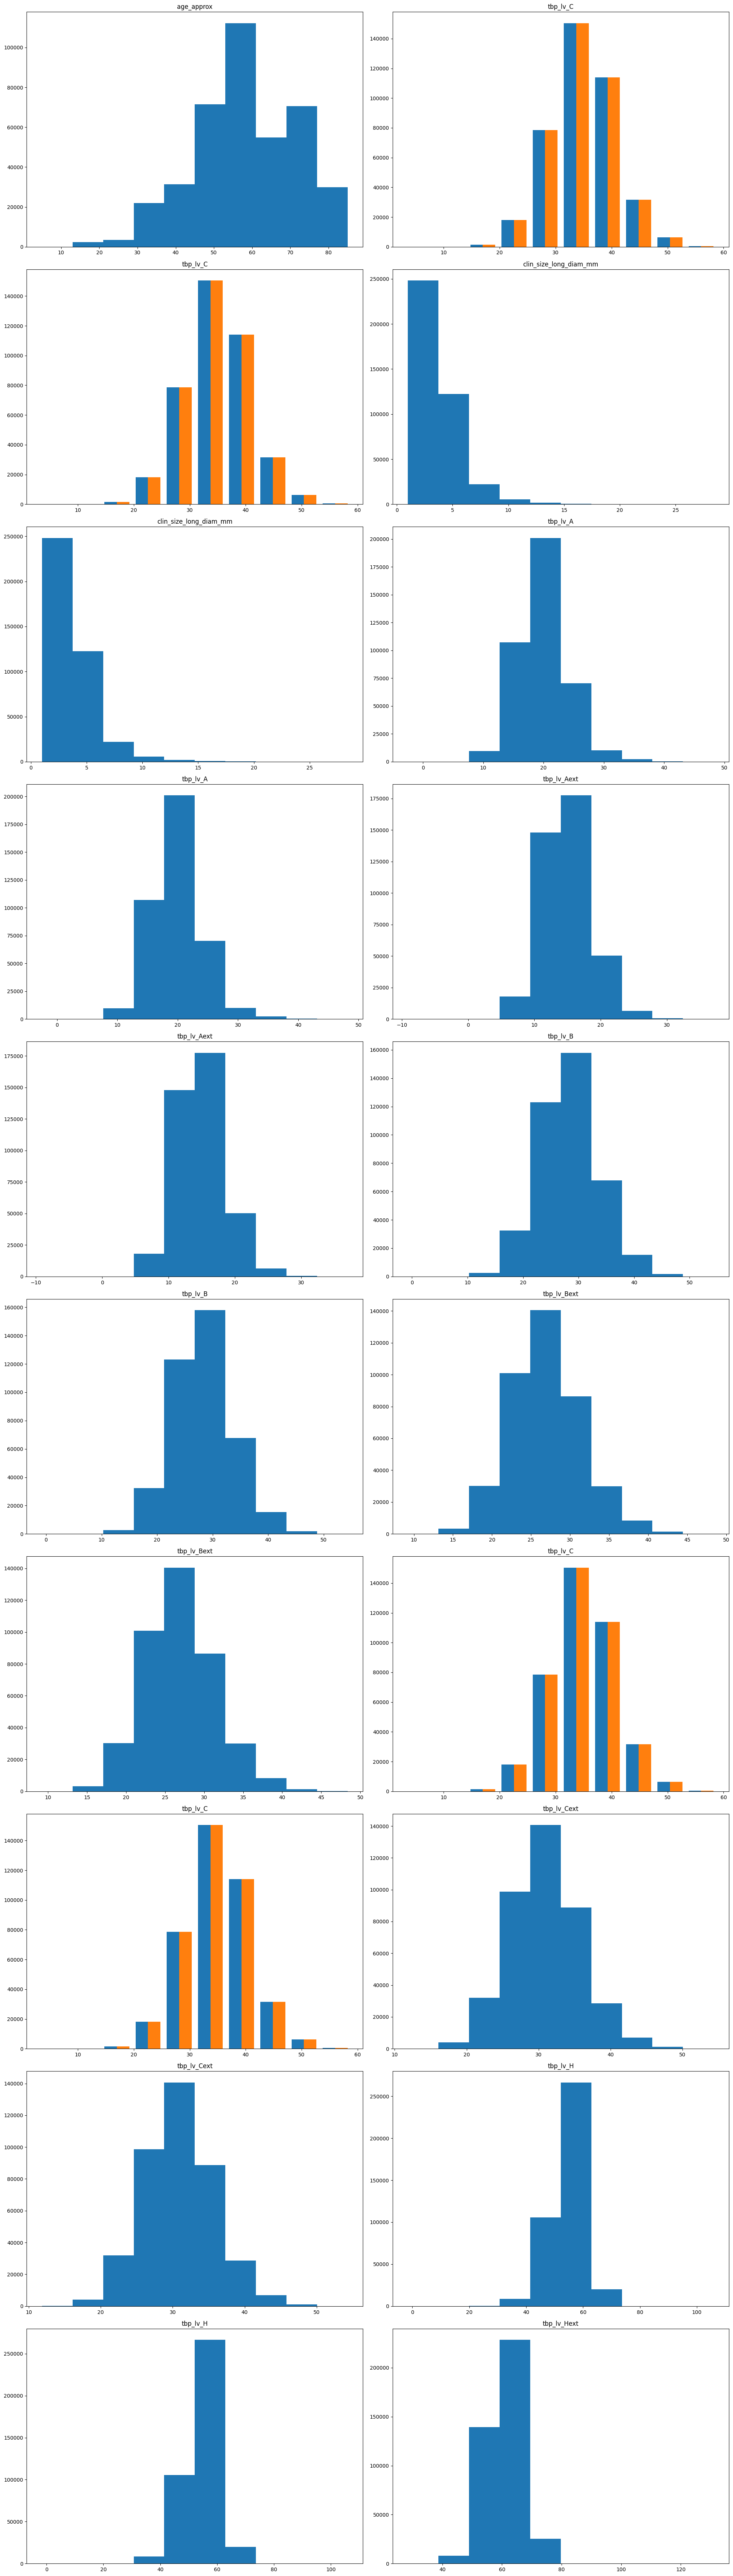

In [17]:

fig, ax = plt.subplots(nrows=10, ncols=2, figsize=(20, 70))

for idx_row, row in enumerate(ax):
    for idx, col in enumerate(row):
        col.hist(continous_vars[continous[idx_row + idx]])
        col.set_title(continous[idx_row + idx])

plt.tight_layout()

plt.show()

In [18]:
# Create a linear regression model to predict target
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Normalize columns
for col in continous:
  continous_vars[col] = (continous_vars[col] - continous_vars[col].min()) / (continous_vars[col].max() - continous_vars[col].min())

# Get NaN value counts age_approx : 2798
#nan_counts = continous_vars.isna().sum()
mean_age = continous_vars['age_approx'].mean()
continous_vars['age_approx'].fillna(mean_age, inplace=True)

# Split dataset
train_df, test_df = train_test_split(continous_vars, test_size=0.2, random_state=42)

<ipython-input-18-cae4d1e1cfdc>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  continous_vars[col] = (continous_vars[col] - continous_vars[col].min()) / (continous_vars[col].max() - continous_vars[col].min())
<ipython-input-18-cae4d1e1cfdc>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  continous_vars['age_approx'].fillna(mean_age, inplace=True)


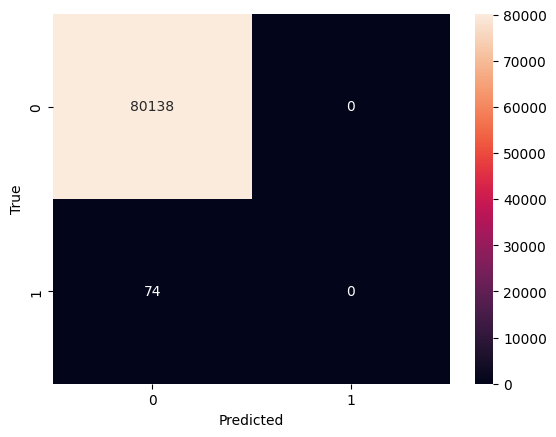

In [19]:

# Create a linear regression model
model = LogisticRegression()
model.fit(train_df[continous], train_df['target'])

y_pred = model.predict(test_df[continous])

# Plot confusion matrix of y_pred against test_df['target']
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(test_df['target'], y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [60]:
# 0: 400666, 1: 393
print(train_df['target'].value_counts())

# Undersample class 0
cls_indices = [idx for idx, cls in enumerate(train_df['target'].values) if cls == 0]
sampled_indces = np.random.choice(cls_indices, size=000, replace=False)

# Concatenate class 0 and class 1
train_df = pd.concat([train_df.iloc[sampled_indces], train_df[train_df['target'] == 1]])

# Shuffle dataset
train_df = train_df.sample(frac=1).reset_index(drop=True)

target
0    10000
1      319
Name: count, dtype: int64


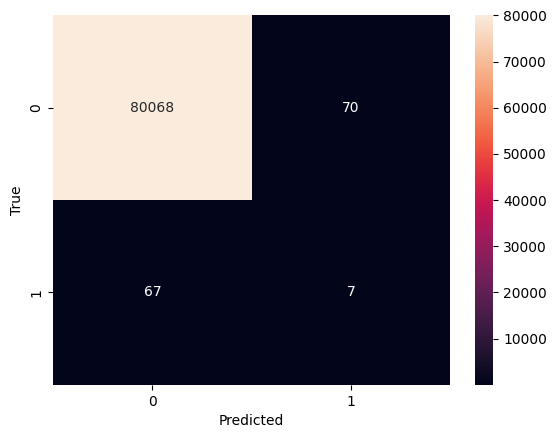

In [21]:

# Create a linear regression model
model = LogisticRegression()
model.fit(train_df[continous], train_df['target'])

y_pred = model.predict(test_df[continous])

# Plot confusion matrix of y_pred against test_df['target']
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(test_df['target'], y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [11]:
def plot_correlation(vars, target, start):
  df_filter = vars.iloc[:,start:start+15]
  df_filter['target'] = target
  corr = df_filter.corr()
  plt.figure(figsize=(10,8))
  sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
  plt.title('Correlation Heatmap')
  plt.show()

In [24]:
import os
image_dir = 'Kaggle-ISIC-Challenge/dataset/train-image/image'
all_images = os.listdir(image_dir)
print(f'Number of images: {len(all_images)}')

Number of images: 401059


In [51]:
import tensorflow as tf
from PIL import Image

IMAGE_SIZE = 224
vgg_model = tf.keras.applications.vgg16.VGG16(include_top=False, weights = 'imagenet', input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3))
for layer in vgg_model.layers:
    layer.trainable = False



In [61]:
images = []
for idx in range(len(ids)):
  q = Image.open(f'{image_dir}/{ids[idx]}.jpg')
  q = np.array(q.resize((IMAGE_SIZE, IMAGE_SIZE)))
  images.append(q)


KeyboardInterrupt: 

In [57]:
output = vgg_model(np.array(images).reshape(len(ids), IMAGE_SIZE, IMAGE_SIZE, 3))
output = tf.keras.flatten(output, [len(ids), 7*7*512])
output.shape

TensorShape([5, 7, 7, 512])

In [ ]:
def data_generator(batch_size):
  def __getitem__(self, index):


In [31]:
'''
vit_model = vit.vit_b16(
        image_size = IMAGE_SIZE,
        activation = 'sigmoid',
        pretrained = True,
        include_top = False,
        pretrained_top = False,
        classes = 2)
'''
inputs = tf.keras.layers.Input((IMAGE_SIZE, IMAGE_SIZE, 3))
#vgg_output = tf.keras.layers.Flatten()(vgg_model(inputs))
#vit_output = vit_model(inputs)
#x = tf.keras.layers.Concatenate(axis=-1)([vgg_output, vit_output])
#x = tf.keras.layers.Concatenate(axis=-1)([vgg_output, ])

x = tf.keras.layers.Dense(512, activation = tf.nn.activations.relu)(x)
x = tf.keras.layers.Dense(256, activation = tf.nn.activations.relu)(x)
x = tf.keras.layers.Dense(64, activation = tf.nn.activations.relu)(x)
x = tf.keras.layers.BatchNormalization()(x)
outputs = tf.keras.layers.Dense(1, 'sigmoid')(x)
model = tf.keras.Model(inputs, outputs)
print(model.summary())

/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.13.0 and strictly below 2.16.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.17.0 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're u

ModuleNotFoundError: No module named 'keras.src.engine'

In [30]:
!pip install tensorflow-addons

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 12.6 MB/s eta 0:00:00
  Attempting uninstall: typeguard
    Found existing installation: typeguard 4.3.0
    Uninstalling typeguard-4.3.0:
      Successfully uninstalled typeguard-4.3.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
inflect 7.3.1 requires typeguard>=4.0.1, but you have typeguard 2.13.3 which is incompatible.


<ipython-input-41-7d0b00d66be4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter['target'] = target


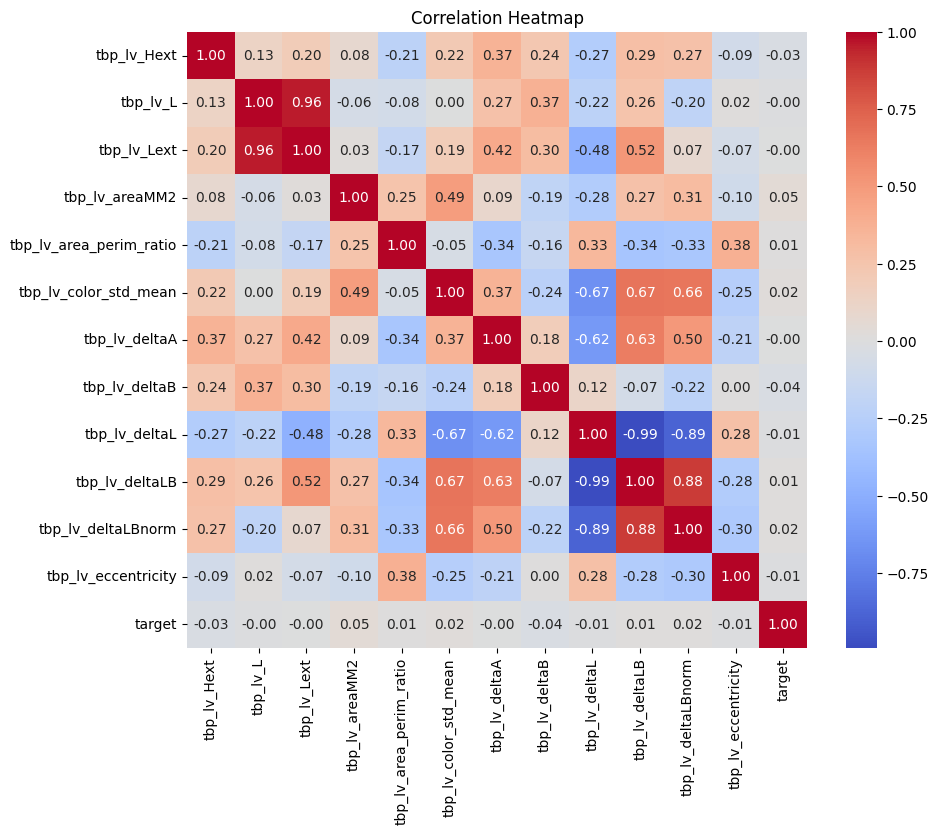

In [ ]:
target = train_df['target'].values
# Take random sample from
target =
plot_correlation(continous_vars, target, 10)

In [1]:
!git clone https://github.com/roshan151/Kaggle-ISIC-Challenge.git

fatal: destination path 'Kaggle-ISIC-Challenge' already exists and is not an empty directory.


In [ ]:
#!pip install colab-xterm
%load_ext colabxterm
%xterm

Launching Xterm...

<IPython.core.display.Javascript object>

In [ ]:
l